# Homework 1

### Question 1

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

Part (a): I have used the standard random.randn method in numpy to generate standard normal random variable samples.

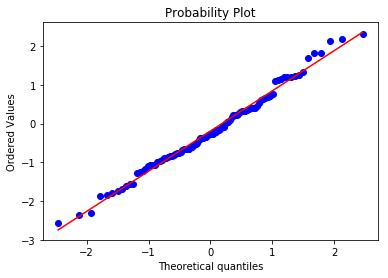

In [2]:
normal_sample1 = np.random.randn(100)
sample1_QQ = sps.probplot(normal_sample1,plot=plt)

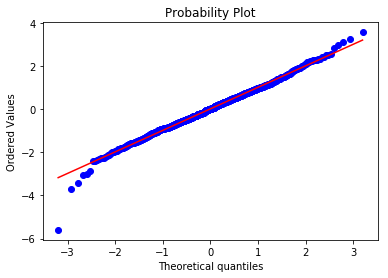

In [3]:
normal_sample2 = np.random.randn(1000)
sample2_QQ = sps.probplot(normal_sample2,plot=plt)

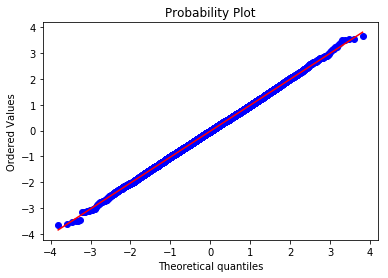

In [4]:
normal_sample3 = np.random.randn(10000)
sample3_QQ = sps.probplot(normal_sample3,plot=plt)

Part (b) Under this method, I use random.rand in numpy to generate samples from uniform distribution and use
the provided method to generate samples from the "poor man's" standard normal random number generator. I wrote
a separate function to perform this generation

In [5]:
def generate_poor_normal_samples(size):
    poor_normal_sample = np.zeros(size)
    for i in range(size):
        unif_samples = np.random.rand(12)
        poor_normal_sample[i] = sum(unif_samples)-6
    return poor_normal_sample

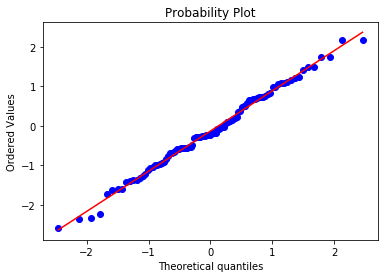

In [6]:
poor_normal_sample1 = generate_poor_normal_samples(100)
sample1_QQ = sps.probplot(poor_normal_sample1,plot=plt)

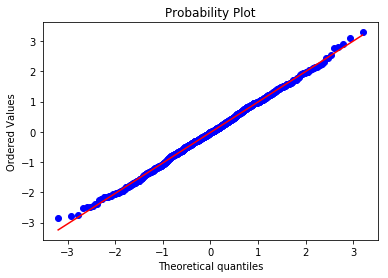

In [7]:
poor_normal_sample2 = generate_poor_normal_samples(1000)
sample2_QQ = sps.probplot(poor_normal_sample2,plot=plt)

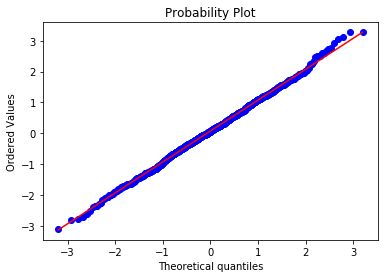

In [8]:
poor_normal_sample3 = generate_poor_normal_samples(1000)
sample3_QQ = sps.probplot(poor_normal_sample3,plot=plt)

Based on the Q-Q plots, I can observe that the "poor man's" random number generator does a very good job when samples
generated were for n = 1000, 10000, meaning for larger number of samples and is almost comparable to the standard 
normal random number generator provided by numpy. For smaller number of samples though (n=100), the samples generated
by the "poor man's" generator had a worse fit to the Q-Q plot compared to numpy. 

Thus to summarize, if the number of samples to be generated using the "poor man's" random number generator is large (of 
the order of thousands), then it will do a descent job, and almost as good as any other standard methods provided by
python packages like numpy.

### Question 2 

In [9]:
sigma = 0.1
T = 1
r = 0.05
mu = 0.1
S0 = 100
K = 100


In [10]:
def straddle_payoff(S,K):
    return np.maximum(S-K,0) + np.maximum(K-S,0)

In [11]:
def european_GBM_end_pricer(S0,K,r,sigma,T,n,payoff):
    samples = np.random.randn(n)
    pv = np.exp(-r*T)
    Si = S0*np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*samples)
    pi = pv*payoff(Si,K)
    p = np.mean(pi)
    p_se = np.std(pi)/np.sqrt(n)
    return p,p_se

In [12]:
(price,se) = european_GBM_end_pricer(S0,K,r,sigma,T,10000,straddle_payoff)
print( "Price of the straddle is $%.3f with a standard error of $%.4f" % (price,se))

Price of the straddle is $8.784 with a standard error of $0.0695


### Question 3

In [13]:
S0 = 100
r = 0.05
sigma = 0.1
T = 1
N = 52
delta = T/N
n = 10000
K = 100
def one_step_forward_price(S, r,sigma,delta):
    shape = S.shape[0]
    z_sample = np.random.randn(shape)
    S_next = S*np.exp((r-0.5*sigma**2)*delta + sigma*np.sqrt(delta)*z_sample)
    return S_next


In [23]:
def generate_price_paths(S0,r,sigma,n,N,delta):
    price_paths = np.zeros((n,N))
    price_paths[:,0] = S0
    for t in range(1,N):
        price_paths[:,t] = one_step_forward_price(price_paths[:,t-1],r,sigma,delta)
    return price_paths
def calculate_corr_coeff(S0,r,sigma,n,N,delta):
    price_paths = generate_price_paths(S0,r,sigma,n,N,delta)
    average_price = np.mean(price_paths,axis=1)   
    X = price_paths[:,N-1]
    Y = average_price
    Z = np.maximum(average_price[:]-S0,0)
    correlation1 = np.corrcoef(X,Y)[0,1]
    correlation2 = np.corrcoef(X,Z)[0,1]
    return (correlation1,correlation2)


In [27]:
correlations1 = np.zeros(K)
correlations2 = np.zeros(K)

for i in range(K):
    (correlations1[i],correlations2[i]) = calculate_corr_coeff(S0,r,sigma,n,N,delta)
correlation1 = np.mean(correlations1)
standard_error1 = np.std(correlations1)
print( "Estimate of the correlation between S-T and A is %.4f with a standard error of %.4f" % (correlations1[0],standard_error1))
print( "A better (tight) estimate of the correlation is %.4f with a standard error of %.4f" % (correlation1,standard_error1/np.sqrt(K)))

correlation2 = np.mean(correlations2)
standard_error2 = np.std(correlations2)
print( "Estimate of the correlation between S-T and max(A-S0,0) is %.4f with a standard error of %.4f" % (correlations2[0],standard_error2))
print( "A better (tight) estimate of the correlation is %.4f with a standard error of %.4f" % (correlation2,standard_error2/np.sqrt(K)))


Estimate of the correlation between S-T and A is 0.8734 with a standard error of 0.0023
A better (tight) estimate of the correlation is 0.8718 with a standard error of 0.0002
Estimate of the correlation between S-T and max(A-S0,0) is 0.8125 with a standard error of 0.0033
A better (tight) estimate of the correlation is 0.8152 with a standard error of 0.0003


### Question 4

Part (a)

From the given cdf with $\theta > 0$, when $x>0$
\begin{equation}
F(x) = 1 - (1+\theta x)^{(-1/\theta)}
\end{equation}

I derive the inverse function as below,

\begin{equation}
F^{-1}(x) = \frac{((1-x)^{-\theta} - 1)}{\theta}
\end{equation}

Thus, generated samples from the distribution of $X$ can be calculated as, 
\begin{equation}
X = F^{-1}(U)
\end{equation}

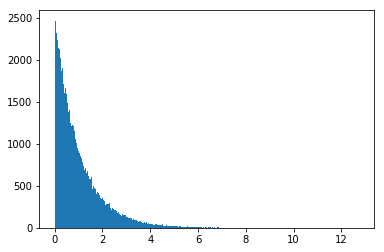

In [16]:
U = np.random.rand(100000)
theta = 0.01#can be parametrized
def inverse_f_a(u,theta):
    x = (np.power(1-u,-theta)-1)/theta
    return x
X = inverse_f_a(U,theta)
p = plt.hist(X,bins=500)

Part (b)

From the given cdf, when $X\geq max(0,b)$
\begin{equation}
F(x) = 1 - e^{-2x(x-b)/h}
\end{equation}

I derive the inverse function as below,

\begin{equation}
F^{-1}(x) = \frac{b}{2} \pm (\frac{b^2}{4} - \frac{h}{2}ln(1-x))^{1/2}
\end{equation}

Thus, generated samples from the distribution of $X$ can be calculated as, 
\begin{equation}
X = F^{-1}(U)
\end{equation}
the value of $X$ which satisfies the condition $X \geq max(0,b)$ will be considered as the sample, which can be shown to be,

\begin{equation}
X = \max(\frac{b}{2} + (\frac{b^2}{4} - \frac{h}{2}ln(1-x))^{1/2},\frac{b}{2} - (\frac{b^2}{4} - \frac{h}{2}ln(1-x))^{1/2})
\end{equation}

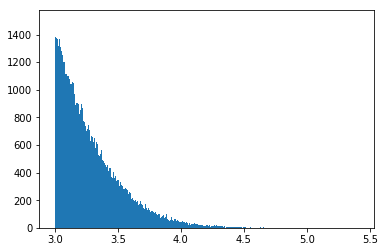

In [17]:
U = np.random.rand(100000)
b = 3#can be parametrized
h = 2#can be parametrized
def inverse_f_b(u,b,h):
    x1 = b/2 + ((b**2)/4 - h*np.log(1-u)/2)**(0.5)
    x2 = b/2 + ((b**2)/4 - h*np.log(1-u)/2)**(0.5)
    return np.maximum(x1,x2)
X = inverse_f_b(U,b,h)
p = plt.hist(X,bins=500)

Part (c)

p.d.f. of the cauchy distribution is 
\begin{equation}
f_X(x) = \frac{1}{\pi}\frac{1}{1+x^2} , -\infty < x < \infty
\end{equation}
Thus, the c.d.f. of the cauchy distribution is, 

\begin{equation}
F_X(x) = \int_{-\infty}^{x} f_X(x)dx = \frac{1}{\pi}\tan^{-1}(x) + \frac{1}{2}
\end{equation}
thus the inverse of the CDF would be,

\begin{equation}
F^{-1}_X(x) = \tan(\pi(x-\frac{1}{2})), 0 \leq x \leq 1
\end{equation}

If U ~unif[0,1] Samples from the cauche distribution can be generated as,
\begin{equation}
X = \tan(\pi(U-\frac{1}{2}))
\end{equation}

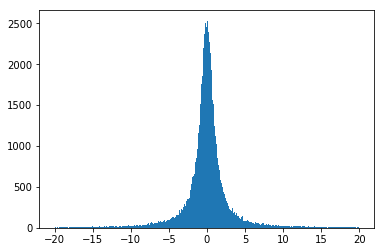

In [18]:
U = np.random.rand(100000)
def inverse_cauchy(u):
    return np.tan(np.pi*(u-0.5))
X = inverse_cauchy(U)
#very heavy tails skew the plots, so restrict within a bound
Y = X[X>-20]
p = plt.hist(Y[Y<20],bins=500)

### Question 5

Let X be a standard normal RV and Y be a RV following cauchy distribution. Then $G_C(x)$ can be written as, 
\begin{equation}
G_C(x) = \frac{f_X(x)}{Cf_Y(x)} = \frac{1}{C} \sqrt{\frac{\pi}{2}} (1+x^2)e^{-x^2/2}
\end{equation}
which attains maximum for $x = \pm 1$. Thus, 
 
\begin{equation}
G_C(x) \leq \frac{1}{C} \sqrt{\frac{2\pi}{e}} -\infty < x < \infty
\end{equation}

So the value of $C$ which will make $G_C(x) \leq 1$ for all values x is $\sqrt{\frac{2\pi}{e}}$ which is 1.521

Thus, on average 15,210 cauchy random variable is needed to generate 10,000 standard normals


In [19]:
def G_C_cauchy_normal(x):
    C = np.sqrt(2*np.pi/np.e)
    return np.sqrt(np.pi/2) * (1+x**2)*np.exp(-x**2/2)/C
def generate_normal_using_cauchy(n):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    y = inverse_cauchy(u1)
    test_Val = G_C_cauchy_normal(y)
    count_success = np.sum(u2 < test_Val)
    result = y[u2<test_Val]
    return result

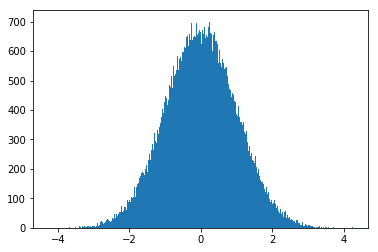

In [20]:
a = generate_normal_using_cauchy(152100)
p= plt.hist(a,bins=500,)